## Import sample data for exploratory analysis

In [1]:
import pandas as pd
df = pd.read_csv('chatgpt_reviews_sample.csv')

## Data Cleaning and Validation

In [62]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f08a3a8b-ae31-4d1e-91b5-d14d504d6cc5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very good,5,0,1.2025.168,2025-07-05 10:41:53,NaN,NaN,1.2025.168
1,a90d3770-06ec-479f-b5ce-467fd4d1a01e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,super,5,0,1.2025.133,2025-06-25 14:31:34,NaN,NaN,1.2025.133
2,aa80b023-1911-4a55-a98d-e25847d889f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,best,5,0,1.2025.077,2025-03-29 12:40:17,NaN,NaN,1.2025.077
3,9275148d-9fce-405e-96c8-4c2891eebe89,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"nice site,very easy and seamless",5,0,1.2025.161,2025-06-24 03:40:27,NaN,NaN,1.2025.161
4,178b8940-1239-4696-96d5-dcb399e15eee,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,this app very helpful/ useful 🙂 👍🏻,5,0,1.2025.175,2025-07-07 09:52:25,NaN,NaN,1.2025.175


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  9281 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          4 non-null      object
 9   repliedAt             4 non-null      object
 10  appVersion            9281 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [ ]:
# Observation:
# No null comments suggest that the quality of the scraped data is good for futher analysis. 
# the 'at' timestamps are currently in the format of object. For time-based analysis, they should be converted to datetime format 

In [2]:
# Converting 'at' column to datetime format
df['at'] = pd.to_datetime(df['at'])
df['at'].head()

0   2025-07-05 10:41:53
1   2025-06-25 14:31:34
2   2025-03-29 12:40:17
3   2025-06-24 03:40:27
4   2025-07-07 09:52:25
Name: at, dtype: datetime64[ns]

In [65]:
df.describe()

,score,thumbsUpCount,at
count,10000.000000,10000.000000,10000
mean,4.519900,4.164100,2025-01-25 15:11:49.270200064
min,1.000000,0.000000,2023-07-25 11:11:36
25%,5.000000,0.000000,2024-11-03 09:45:19.500000
50%,5.000000,0.000000,2025-03-31 09:37:22
75%,5.000000,0.000000,2025-06-04 05:35:58.249999872
max,5.000000,39058.000000,2025-07-31 17:52:57
std,1.070943,390.622692,NaN


In [ ]:
# Observation:
# As shown by the data summary, the score for ChatGPT app is heavily skewed towards positive. 
# thumbsUpCount is highly polarized, with majority of data valued at zero and the highest of data valued at 39058.000000
# The sample covers approximately two years of review history and is very current, with the latest data from just a few days ago.

## Score Distribution Analysis

c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


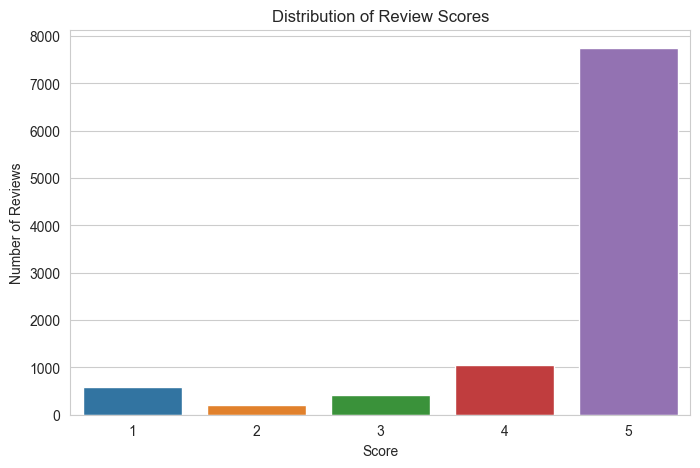

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create a bar chart of score counts
score_counts = df['score'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.savefig('images/reviewscoresbar.png')
plt.show()

In [ ]:
# Observation
# The score is skewed heavily towards extreme positive. 

## Time-Based Analysis
The time-based analysis shows the change in average scores over time. It helps reflecting the change in user sentiment after upgrades

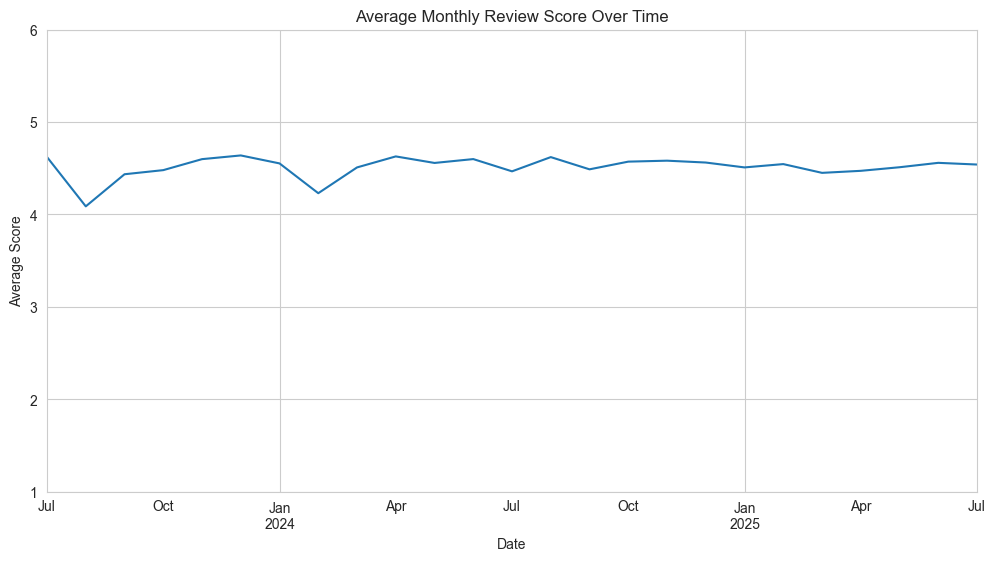

In [95]:
# Set 'at' as the DataFrame index for time-based resampling
df.set_index('at', inplace=True)

# Plot average monthly score
monthly_avg_score = df['score'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_avg_score.plot()
plt.title('Average Monthly Review Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.ylim(1, 6) # Set y-axis limits to match score range
plt.savefig('images/monthlyaveragescore.png')
plt.show()

In [ ]:
# Observation
# Average monthly score flutuates more drastically in the early months, with major valleys, likely reflecting unstable performance with earlier updates. However, the overal trend stays steadily above 4, signaling general user satisfaction since the app was launched.

## Text Content Analysis

### 1. Percentage of reviews in English 

Detecting languages... This may take a moment.
Generating pie chart...


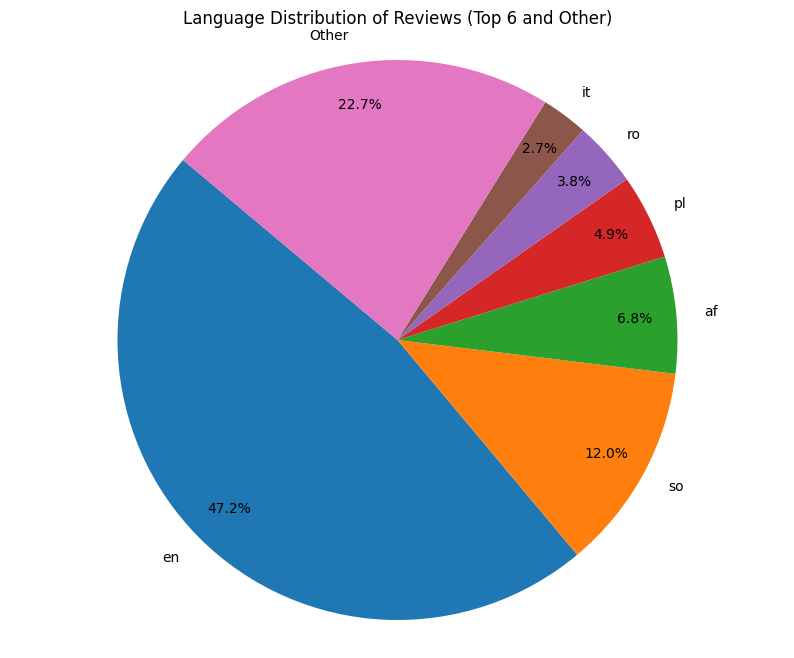


Top languages detected:
language
en         4720
so         1198
af          675
pl          491
ro          375
it          267
unknown     267
ca          223
fr          160
sw          140
Name: count, dtype: int64


In [3]:
import pandas as pd
from langdetect import detect, LangDetectException
import matplotlib.pyplot as plt

# Drop rows with no text content to avoid errors
df.dropna(subset=['content'], inplace=True)

# Function to detect language safely
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply the function to create the 'language' column
print("Detecting languages... This may take a moment.")
df['language'] = df['content'].apply(detect_language)

# --- 1. Process Data for the Pie Chart ---

# Get the counts of each language
lang_counts = df['language'].value_counts()

# Define how many top languages to show separately
top_n = 6
# Create a new Series for the chart data
pie_data = lang_counts.head(top_n).copy()
# Sum the counts of all other languages
other_count = lang_counts.iloc[top_n:].sum()

# Add the 'Other' category if there are more languages than top_n
if len(lang_counts) > top_n:
    pie_data['Other'] = other_count


# --- 2. Generate and Display the Pie Chart ---

print("Generating pie chart...")
plt.figure(figsize=(10, 8))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%', # Format percentages to one decimal place
    startangle=140,    # Rotate the chart for better label placement
    pctdistance=0.85   # Move percentage labels closer to the center
)

plt.title('Language Distribution of Reviews (Top 6 and Other)')
# Ensures the pie chart is a circle.
plt.axis('equal')
plt.savefig('images/langdistributionpiechart.png')
plt.show()

# print the raw numbers
print("\nTop languages detected:")
print(lang_counts.head(10))

In [ ]:
# Observation

# English content is the largest single language group. This sample strongly suggests that the full 1.2 million review dataset contains a statistically significant volume of English-language reviews (likely over 500,000). Focusing on English-only content is recommended in further sentiment analysis

### 2. Length of reviews

In [4]:
# 2. IMPORTANT: Filter for English reviews FIRST
df_english = df[df['language'] == 'en'].copy()
df_english['reviews_word_count']=df_english['content'].str.split().map(len)

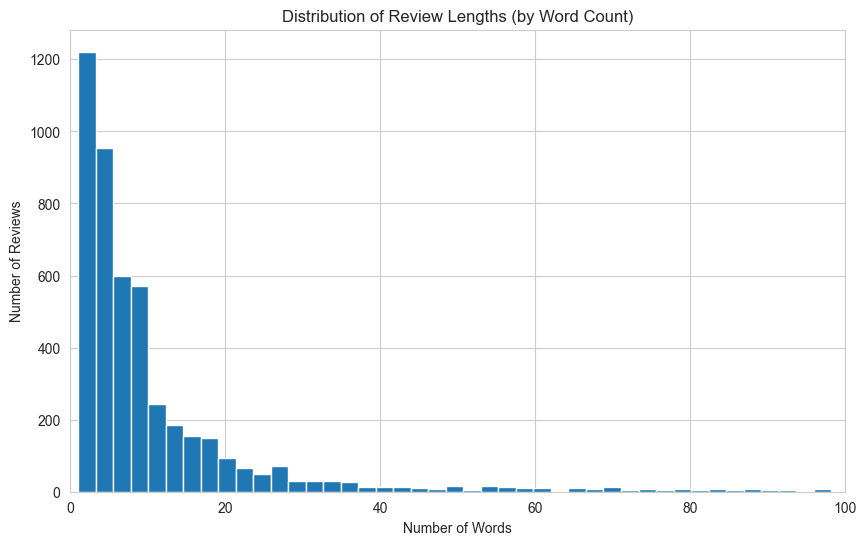

In [85]:
plt.figure(figsize=(10, 6))
df_english['reviews_word_count'].hist(bins=50)
plt.title('Distribution of Review Lengths (by Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.xlim(0, 100) # Limit x-axis for better readability
plt.savefig('images/reviewlengthhist.png')
plt.show()

In [75]:
df_english['reviews_word_count'].describe()

count    4709.000000
mean       10.922489
std        14.346770
min         1.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       114.000000
Name: reviews_word_count, dtype: float64

In [ ]:
# Observation:
# Majority of reviews are very concise, reaching 12 words or less. For advanced tasks like topic modeling, it is recommended to focus on top 25% reviews that are longer.

### 3. Topic modeling exploration with pyLDAvis

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

def preprocess_for_lda(df_column):
    """
    Cleans and tokenizes text data for topic modeling.
    - Converts to lowercase
    - Removes punctuation and numbers
    - Tokenizes text
    - Removes stopwords (including custom ones)
    - Lemmatizes words
    - Removes short words
    """
    corpus = []
    lem = WordNetLemmatizer()

    # Define English stopwords and add custom, context-specific words
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'app', 'chatgpt', 'gpt', 'chat', 'use', 'im', 'ive', 'also','good','best','great','nice','love'}
    stop_words.update(custom_stopwords)

    for text in df_column:
        # Ensure text is a string
        if not isinstance(text, str):
            continue

        # 1. Convert to lowercase and remove non-alphabetic characters
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

        # 2. Tokenize
        words = word_tokenize(text)

        # 3. Lemmatize, remove stopwords and short words
        lemmatized_words = [lem.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]

        corpus.append(lemmatized_words)
        
    return corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m1391\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m1391\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m1391\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

corpus = preprocess_for_lda(df_english['content']) # Using the sample for this example
corpus = [doc for doc in corpus if doc]

# Create a dictionary representation of the documents
dic = Dictionary(corpus)

# Filter out extremes to remove noise (words that are too rare or too common)
dic.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create the Bag-of-Words corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

# --- 4. Train the LDA Model ---

print("Training LDA model... This may take a few minutes.")
# We'll look for 8 topics, which is a good starting point for a rich dataset
lda_model = LdaMulticore(
    bow_corpus,
    num_topics=8,
    id2word=dic,
    passes=10,
    workers=2  # Use 2 workers for parallel processing
)

# --- 5. Display the Topics ---

print("\n--- Identified Topics ---")
# The show_topics() method prints the keywords for each topic and their relative importance
topics = lda_model.show_topics(num_words=10, formatted=False)

for topic_id, topic in topics:
    print(f"Topic {topic_id + 1}: {[word for word, prop in topic]}")


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\m1391/nltk_data'
    - 'c:\\Users\\m1391\\anaconda\\nltk_data'
    - 'c:\\Users\\m1391\\anaconda\\share\\nltk_data'
    - 'c:\\Users\\m1391\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\m1391\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
 # Observation
 # The topics suggest that the text contains specific, actionable feedback. The dataset could be used for detailed sentiment analysis, such as sentiment analysis by topic

### 4.Wordcloud

Loading data...
Created a single text string with 275231 characters.
Generating word cloud...


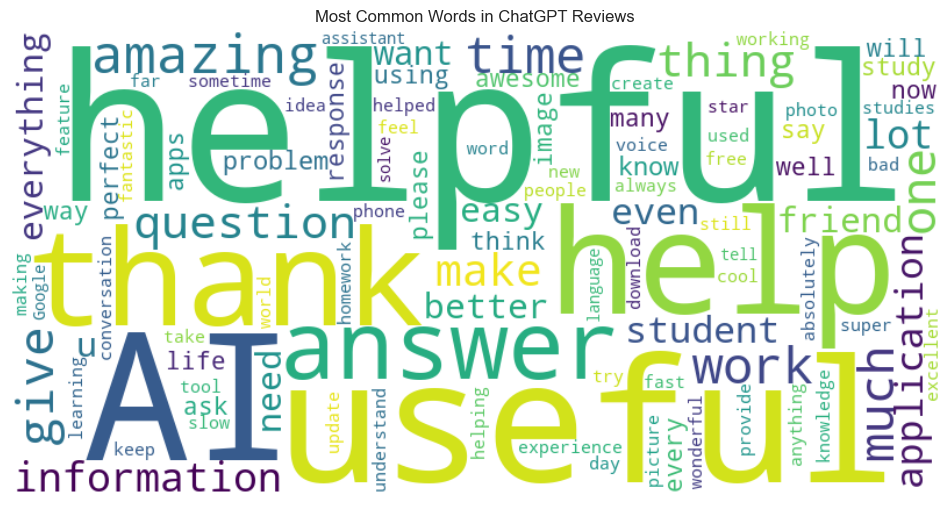

In [87]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

print("Loading data...")

# Join all review text into a single large string
all_text = " ".join(review for review in df_english.content)

print(f"Created a single text string with {len(all_text)} characters.")


# Start with the default stopwords from the library
stopwords = set(STOPWORDS)
# Add custom words specific to this dataset for a cleaner cloud
custom_stopwords = {'app', 'chatgpt', 'gpt', 'chat', 'use', 'im', 'ive', 'also', 'really','good', 'great', 'best', 'nice', 'love'}
stopwords.update(custom_stopwords)


# --- 3. Generate and Display the Word Cloud ---

print("Generating word cloud...")
# Create the WordCloud object
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    max_words=100,
    width=800,
    height=400,
    colormap='viridis' # A nice color scheme
)

# Generate the word cloud from your text
wordcloud.generate(all_text)

# Display the generated image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Don't show the axes
plt.title('Most Common Words in ChatGPT Reviews')
plt.savefig('images/wordcloud.png')
plt.show()

In [ ]:
# Observation
# The word cloud suggests that the app excels in functionality and is a powerful tool for most users

### 5. Rudimentary sentiment analysis

Running TextBlob analysis...


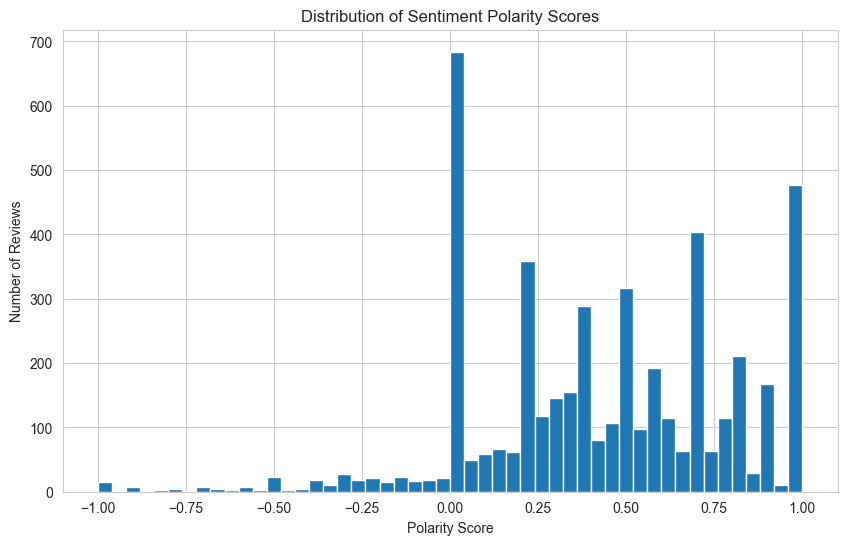

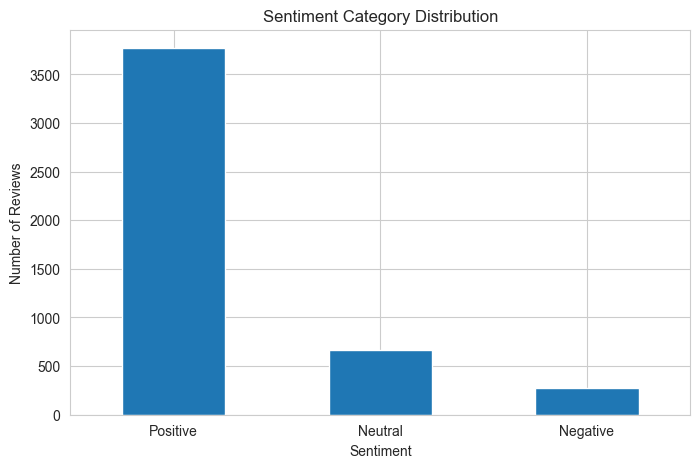


--- Example Positive Reviews (Score 5) ---
                                                content  polarity_score
at                                                                     
2025-06-24 03:40:27    nice site,very easy and seamless        0.377778
2025-07-07 09:52:25  this app very helpful/ useful 🙂 👍🏻        0.250000
2025-04-01 06:00:58               very much helpful app        0.260000
2024-11-12 23:14:57                 it knows everything        0.000000
2025-05-03 22:49:00     this app or ai app is just good        0.700000

--- Example Negative Reviews (Score 1) ---
                                                               content  \
at                                                                       
2025-06-20 02:09:29  they ask for the pay when I select pictures so...   
2024-11-06 08:46:35                      Fix the text to speech issue.   
2025-03-31 07:48:54  facing the login problem.. please help me.. ho...   
2025-07-28 14:30:12  at beingning best

c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\m1391\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


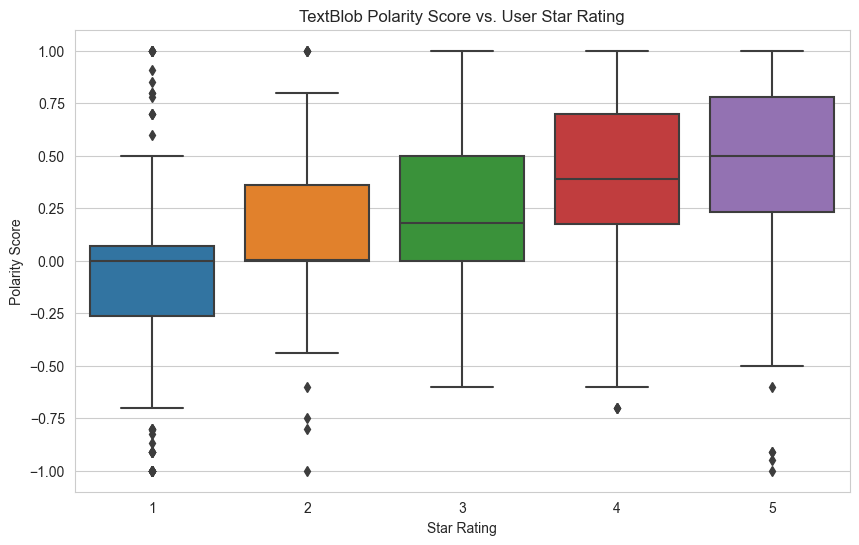

In [89]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


# --- 2. Perform Sentiment Analysis with TextBlob ---
print("Running TextBlob analysis...")

# Define the function to get polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Create a polarity score column
df_english['polarity_score'] = df_english['content'].apply(get_polarity)


# Define the function to categorize sentiment
def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Create a categorical sentiment column
df_english['sentiment'] = df_english['polarity_score'].apply(get_sentiment)


# --- 3. Visualize the Results ---

# Set plot style
sns.set_style("whitegrid")

# Plot histogram of polarity scores
plt.figure(figsize=(10, 6))
df_english['polarity_score'].hist(bins=50)
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Reviews')
plt.savefig('images/polarityhist.png')
plt.show()

# Plot bar chart of sentiment categories
plt.figure(figsize=(8, 5))
df_english['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.savefig('images/sentimentbar.png')
plt.show()


# --- 4. Show Example Reviews ---
print("\n--- Example Positive Reviews (Score 5) ---")
print(df_english[df_english['score'] == 5][['content', 'polarity_score']].head())

print("\n--- Example Negative Reviews (Score 1) ---")
print(df_english[df_english['score'] == 1][['content', 'polarity_score']].head())


# --- 5. IMPORTANT: Compare TextBlob Sentiment with Star Ratings ---
print("\n--- Comparing TextBlob Polarity to User Star Ratings ---")
# This is the most valuable part of the evaluation.
# It shows if the sentiment in the text matches the rating given by the user.

plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='polarity_score', data=df_english)
plt.title('TextBlob Polarity Score vs. User Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Polarity Score')
plt.savefig('images/polarityratingbox.png')
plt.show()

In [ ]:
# Observation
# The TextBlob polarity histogram is characterized by a large volume of neutral or mildly positive comments and a substantial number of clearly positive reviews. The scarcity of negative scores reinforces the high average star rating and indicates a satisfied user base.
# The analysis examples show that TextBlob is good at identifying overtly positive reviews but can struggle with recognizing the sentiment in more nuanced text, especially in negative reviews. Many reviews with strong opinions are given neutral polarity scores
# The boxplot shows a strong positive correlation between user star ratings and the sentiment polarity of the review text, confirming the dataset's suitability for sentiment analysis